# definitions

In [ ]:
import json
import sys
sys.path.append('../py')
import myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams['agg.path.chunksize'] = 10000

recalculate = recompile = True

In [ ]:
def set_ticks(ax_all, N=6, cut_x = 0.15, cut_y = 0.2):
    for ax in ax_all:
        ax.tick_params(axis='both', labelsize=6)
        ax.margins(x=0.)

        box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        box_w = box.width
        box_h = box.height

        if ax.get_xscale() == "log":
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=N))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=N))

        if ax.get_yscale() == "log":
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=N))
            ax.yaxis.set_minor_locator(ticker.LogLocator(subs="auto", numticks=10))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=N))

        (x0, x1) = ax.get_xlim()
        (y0, y1) = ax.get_ylim()


        x0 = ax.dataLim.x0
        x1 = ax.dataLim.x1
        y0 = ax.dataLim.y0
        y1 = ax.dataLim.y1



        axis_to_data = ax.transAxes + ax.transData.inverted()
        (x2, y2) = axis_to_data.transform([1 - cut_x/box.width, 1 - cut_y/box.height])
        (x0, y0) = axis_to_data.transform([-0.1, -0.1])

        # print(x0, x1, x2)
        # print(y0, y1, y2)


        ax.set_xticks([tick for tick in ax.get_xticks() if tick <= x2])
        ax.set_yticks([tick for tick in ax.get_yticks() if tick >= y0 and tick <= y2])

        # print(ax.get_yticklabels())

        if ax.get_yscale() == "log":       
            ax.set_yticklabels([label.get_text().replace("-", "\\mbox{-}") for label in ax.get_yticklabels()])
        # print(ax.get_yticklabels())

def set_labels(ax, x_label, y_label):
    box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    if x_label:
        ax.text(1, -0.05/box.height, x_label, transform=ax.transAxes, va="top", ha="right")
    if y_label:
        ax.text(-0.03/box.width, 1,  y_label, transform=ax.transAxes, va="top", ha="right")

In [ ]:
def w_star(T): # first positive root of `w = -tg(wT)'
    # wT is from pi/2 to 3pi/2 (from the look of the graph)
    l =     np.pi / 2 / T
    r = 3 * np.pi / 2 / T
    w = 0.5*(l+r)
    for i in range(50): 
        if w + np.tan(w * T) < 0:
            l = w
        else:
            r = w
        w = 0.5*(l+r)
    return w

def a_star(T):
    return - np.sqrt( 1 + w_star(T)**2 )
    

# Equations

## One solution

In [ ]:
2:    tau = 0.6,  alpha = -3.33333,    A = 1,   w = 10.5263,
2:    tau = 3.9,  alpha = -3.33333,    A = 1.44444,   w = 2.10526,
3:    tau = 3.9,  alpha = -3.33333,    A = 1.88889,   w = 2.10526,
2:    tau = 3.9,  alpha = -4.44444,    A = 1.88889,   w = 2.10526,
3:    tau = 3.9,  alpha = -4.44444,    A = 2.77778,   w = 2.10526,
4:    tau = 3.9,  alpha = -4.44444,    A = 3.22222,   w = 2.10526,
2:    tau = 3.9,  alpha = -6.66667,    A = 3.22222,   w = 2.10526,
3:    tau = 3.9,  alpha = -6.66667,    A = 3.66667,   w = 2.10526,

2:    tau = 3.9,  alpha = -5.55556,    A = 2.77778,   w = 2.10526,
3:    tau = 3.9,  alpha = -5.55556,    A = 3.22222,   w = 2.10526,
4:    tau = 3.9,  alpha = -5.55556,    A = 5,   w = 2.10526,

2:    tau = 3.9,  alpha = -7.77778,    A = 3.22222,   w = 2.10526,
3:    tau = 3.9,  alpha = -7.77778,    A = 4.55556,   w = 2.10526,
2:    tau = 4.45,  alpha = -6.66667,    A = 3.22222,   w = 3.15789,
2:    tau = 4.45,  alpha = -7.77778,    A = 1,   w = 2.10526,
3:    tau = 3.9,  alpha = -8.88889,    A = 5,   w = 2.10526,
2:    tau = 4.45,  alpha = -8.88889,    A = 1,   w = 2.10526,
2:    tau = 3.9,  alpha = -10,    A = 4.11111,   w = 2.10526,
2:    tau = 4.45,  alpha = -10,    A = 1,   w = 2.10526,
2:    tau = 5,  alpha = -8.88889,    A = 1.88889,   w = 4.21053,
2:    tau = 5,  alpha = -10,    A = 2.33333,   w = 4.21053,
`````````````````````````````````````````````````````````````````````````````````@`@`@@`@`@@`@````@@ 0:0:11 / 0:0:11                                         ~~~ Computation took 0:0:11 (hh:mm:ss) ~~~

~~~ ../cpp/clip_dde_solution.cpp is executed ~~~
~~~  parameters: {"tau": 3.9, "alpha": -5.55556, "A": 5, "w": 2.10526, "h": 0.05, "t_finish": 50} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/clip_dde_solution.cpp is finished ~~~


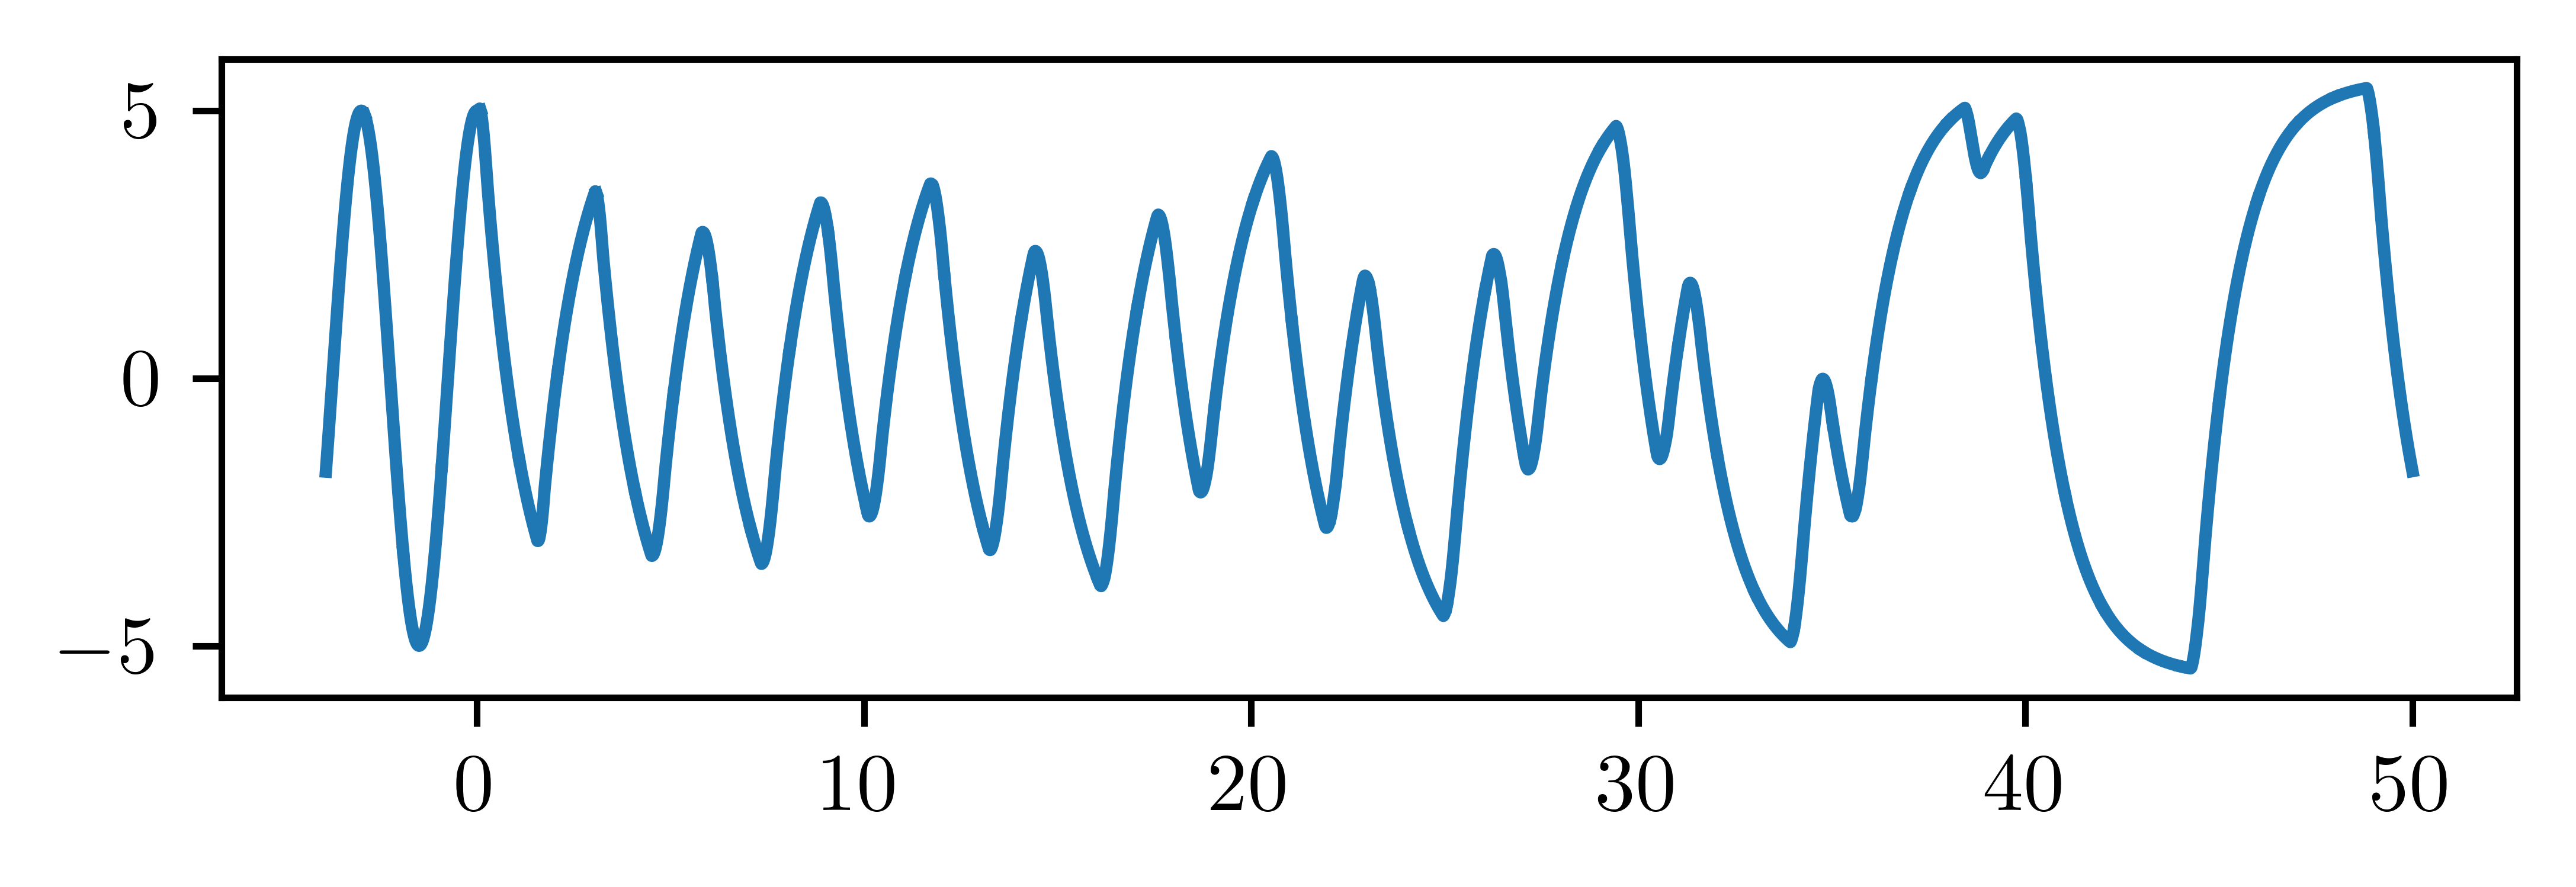

In [403]:
recompile = True
recalculate = True

script = "clip_dde_solution"
params = dict(
    tau = 3.9,  alpha = -5.55556,    A = 5,   w = 2.10526,

    # alpha = -6.5,
    # tau = 3.7,
    h = 0.05,
    t_finish = 50,
    # A = 2.01,
    # w = 4
)

params_str = json.dumps(params)

output_filename = script + " " + params_str
output_filename = output_filename[:min(len(output_filename), 200)] # truncate by 200 characters


if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params_str=params_str, output_filename=output_filename, recompile=recompile, flags = "-O3")

filename_bin = f"../output/bin/{output_filename}.bin"
output = my.get_binary(filename_bin)
t = output.T[0]
x = output.T[1]
fig = plt.figure(figsize=(5,1.4),dpi=1000)
plt.plot(t, x)


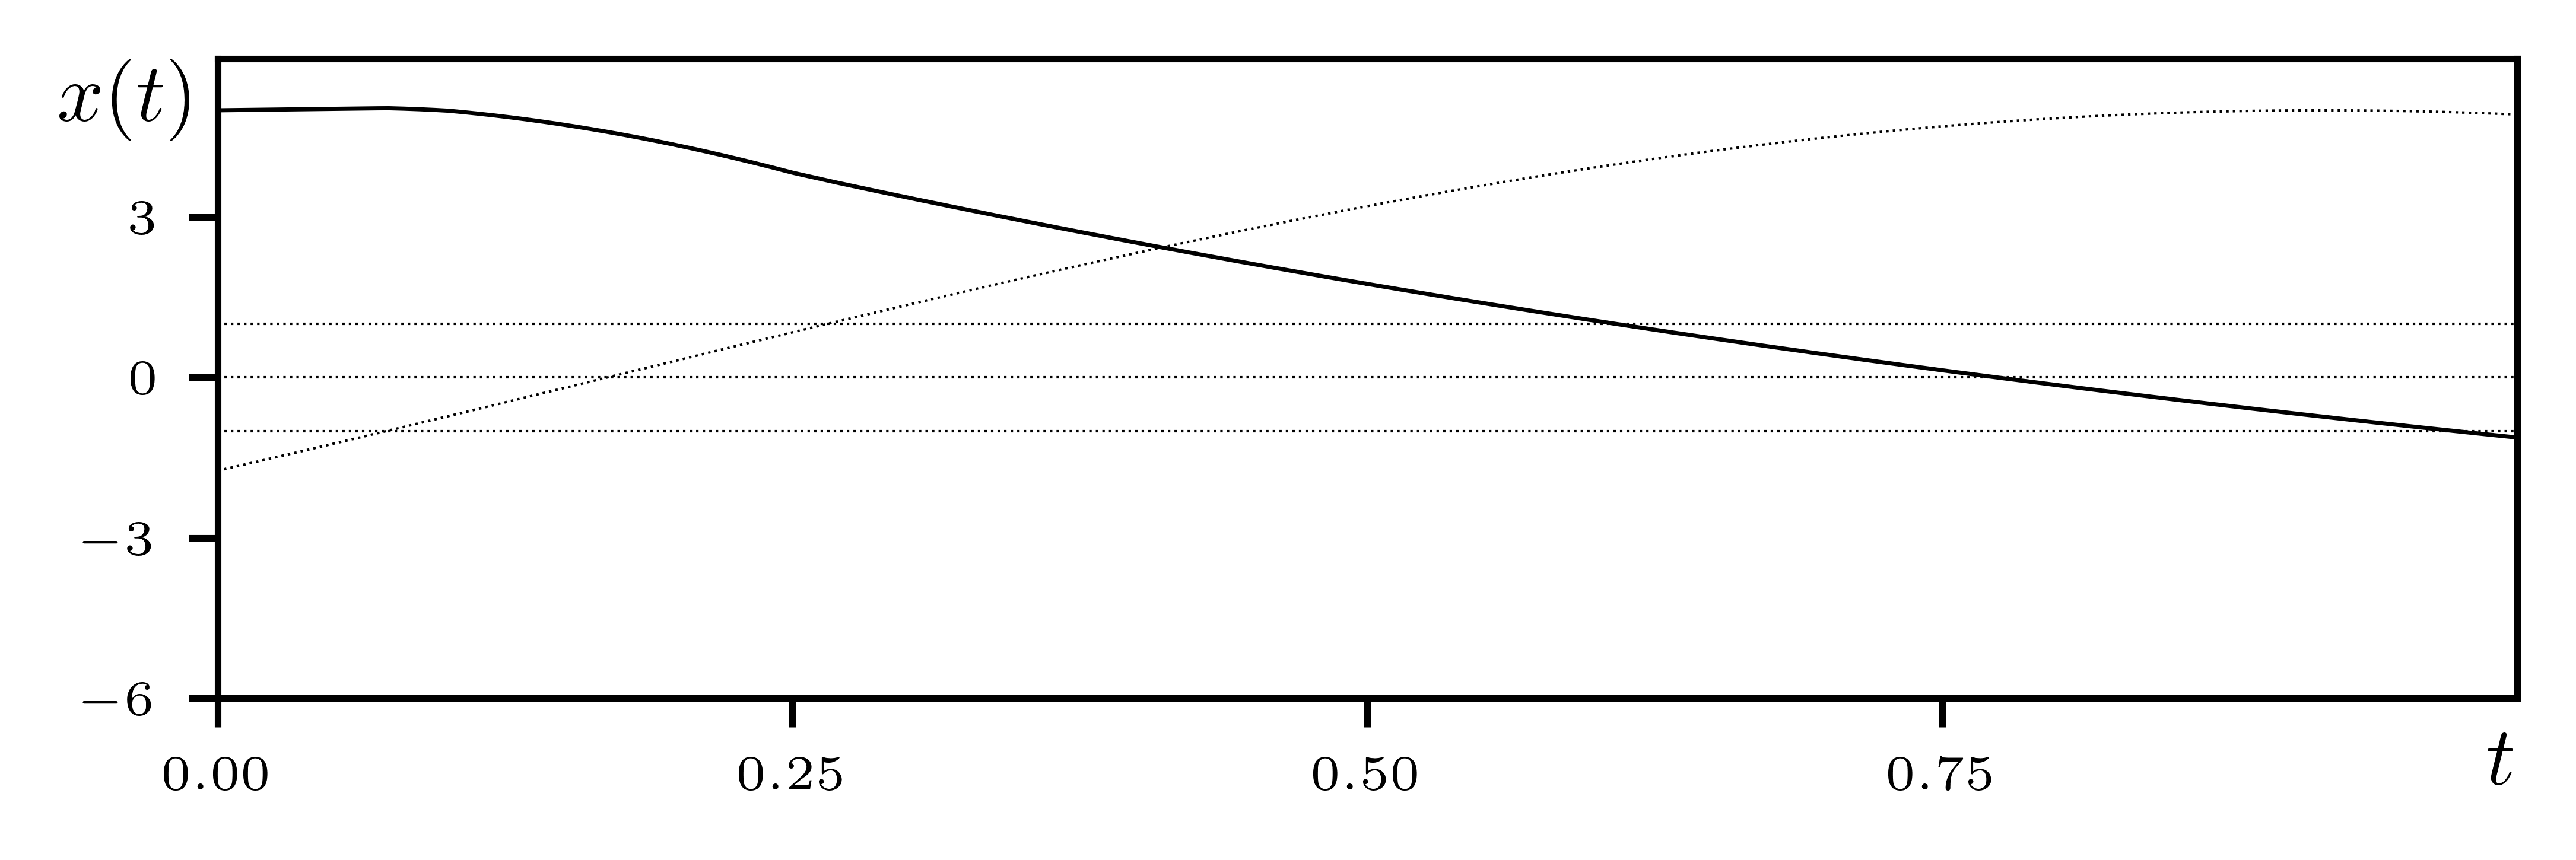

In [402]:
fig = plt.figure(figsize=(5,1.4),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=1, ncols=1)

ax_sol  = plt.subplot(gs[0,0])


ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+params["tau"],x,'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, np.max(t))

ax_sol.set_xlim(0, 1)


ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol.axhline(-1,linestyle=':',c='k',lw=0.3)
ax_sol.axhline(1,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol]
set_ticks(ax_all, N=4, cut_x = 0.3)


set_labels(ax_sol, "$t$", "$x(t)$")

plt.savefig(f"../output/{output_filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)

## Map

In [405]:
### recompile = False
recalculate = True

script = "clip_dde_map"
params = dict(
    alpha_l = -10, alpha_r = 0, alpha_n = 100,
    tau_l = 0.1,   tau_r = 5,  tau_n = 100,
    h = 0.01,    t_finish = 200,
    A_l = 1, A_r = 5, A_n = 1,
    w_l = 0, w_r = 20, w_n = 1
)

params_str = json.dumps(params)

output_filename = script + " " + params_str
output_filename = output_filename[:min(len(output_filename), 200)] # truncate by 200 characters


if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params_str=params_str, output_filename=output_filename, 
               recompile=recompile, flags = "-O3")

filename_bin = f"../output/bin/{output_filename}.bin"
output = my.get_binary(filename_bin)

output.shape
# t = output.T[0]
# x = output.T[1]
# fig = plt.figure(figsize=(5,1.4),dpi=1000)
# plt.plot(t, x)


~~~ ../cpp/clip_dde_map.cpp is executed ~~~
~~~  parameters: {"alpha_l": -10, "alpha_r": 0, "alpha_n": 100, "tau_l": 0.1, "tau_r": 5, "tau_n": 100, "h": 0.01, "t_finish": 200, "A_l": 1, "A_r": 5, "A_n": 1, "w_l": 0, "w_r": 20, "w_n": 1} ~~~
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 0:0:17 / 0:0:17                                         ~~~ Computation took 0:0:17 (hh:mm:ss) ~~~               0:15                                                 :13                                         0:0:3 / 0:0:13                                                                       
~~~ ../cpp/clip_dde_map.cpp is finished ~~~


(100, 100)

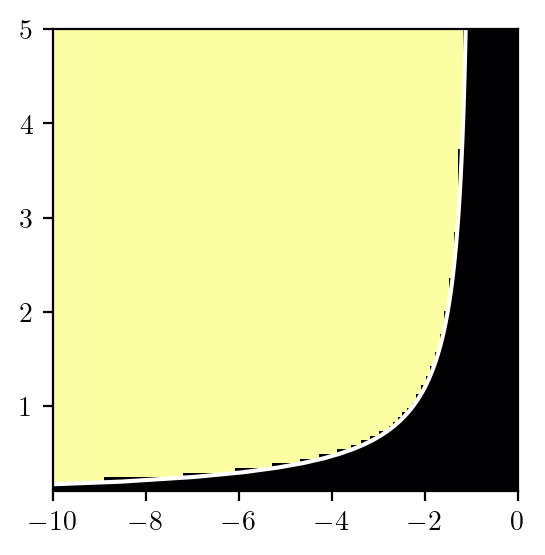

In [406]:
fig = plt.figure(figsize=(3,3),dpi=200)
gs = GridSpec(nrows=1, ncols=1)
ax  = plt.subplot(gs[0,0])

taus = np.linspace(params["tau_l"], params["tau_r"], params["tau_n"])
a_stars = list(map(a_star, taus))

ax.imshow(output.T,
            # cmap="Greys",
            cmap="inferno",
            # cmap="seismic",
            # cmap=lyapunov_cmap,
            # clim=(-1.57, 1.57),
            # clim=(-2, 2),
            #clim=(1, np.max(image_values)//2),
            origin='lower',
            # norm=colors.PowerNorm(gamma=0.5),
          extent=(
          params["alpha_l"],params["alpha_r"],params["tau_l"],params["tau_r"]),
          # aspect=abs((x_to - x_from) / (y_to - y_from)),
          aspect='auto',
          interpolation='nearest')

ax.set_xlim(params["alpha_l"], params["alpha_r"])
# ax.set_ylim(1, 5)

ax.plot(a_stars, taus, c='white')

plt.savefig(f"../output/{output_filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)
plt.savefig(f"../output/{output_filename}.jpg", format="jpg", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)

In [ ]:
np.unique(output)

In [ ]:
fig = plt.figure(figsize=(5,1.4),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=1, ncols=1)

ax_sol  = plt.subplot(gs[0,0])


ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+params["tau"],x,'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, np.max(t))

ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol.axhline(-1,linestyle=':',c='k',lw=0.3)
ax_sol.axhline(1,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol]
set_ticks(ax_all, N=4, cut_x = 0.3)


set_labels(ax_sol, "$t$", "$x(t)$")

plt.savefig(f"../output/{output_filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)

### Lorenz picture

In [ ]:
recompile = True
recalculate = True

script = "ddes_test"
params = dict(
    eq = 'Relay2', b = -0.2, c = 1, d = 1, tau = 1,
    x0=0, v0 = 1, 
    h=0.01, t_finish = 50000
)
params_str = json.dumps(params)

output_filename = script + " " + params_str
output_filename = output_filename[:min(len(output_filename), 200)] # truncate by 200 characters


if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params_str=params_str, output_filename=output_filename, recompile=recompile, flags = "-Wextra -Werror -O3")

filename_bin = f"../output/bin/{output_filename}.bin"
output = my.get_binary(filename_bin)
t = output.T[0]
# le = output.T[1]
x = output[:, 1:].T

# le = output.T[1]

# plt.plot(t, x[0])

In [ ]:
fig = plt.figure(figsize=(5,1.4),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=2, width_ratios=[2, 1,], height_ratios=[3,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
# ax_le   = plt.subplot(gs[0,2])
# ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+params["tau"],x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 200)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)

# step = int(10*len(t)/params["t_finish"])
# for i in range(0, len(t), step):
#     ax_sol2.plot(x[0][i:i+step], x[1][i:i+step], 'k', lw=0.05, alpha=0.01)
    
ax_sol2.plot(x[0], x[1],'k',lw=0.005, rasterized=True)
# ax_sol2.plot(x[0], x[1],'k',lw=0.5, alpha=0.01)
# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)


ax_sol2.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol2.axvline(0,linestyle=':',c='k',lw=0.3)

# le_mean = np.mean(le)
# le_delta1 = np.max(le - le_mean);
# le_delta2 = np.max(le_mean - le);
# le_delta = min(le_delta1, le_delta2)/4;
# ax_le.dataLim.y0 = le_mean - le_delta;
# ax_le.dataLim.y1 = le_mean + le_delta;

# window = len(le)//10
# le_std = pd.Series(le).rolling(window=window).std()
# ax_le_std.plot(t, le_std, 'k', lw=0.5)
# ax_le_std.set_yscale("log")
# le_final = np.mean(le[-window:])


# ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

# ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]
set_ticks(ax_all, N=4, cut_x = 0.3)

ax_sol2.margins(x=0.05,y=0.05)


set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_sol2, "$x(t)$", "$\dot x(t)$")
# set_labels(ax_le, None, "$\lambda(t)$")
# set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"../output/{output_filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)

In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=3, width_ratios=[2, 1, 2], height_ratios=[3,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
ax_le   = plt.subplot(gs[0,2])
ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+params["tau"],x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 200)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

# step = int(10*len(t)/params["t_finish"])
# for i in range(0, len(t), step):
#     ax_sol2.plot(x[0][i:i+step], x[1][i:i+step], 'k', lw=0.05, alpha=0.01)
    
ax_sol2.plot(x[0], x[1],'k',lw=0.005, rasterized=True)
# ax_sol2.plot(x[0], x[1],'k',lw=0.5, alpha=0.01)
# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)


ax_sol2.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol2.axvline(0,linestyle=':',c='k',lw=0.3)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]
set_ticks(ax_all, N=4, cut_x = 0.3)

ax_sol2.margins(x=0.05,y=0.05)


set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_sol2, "$x(t)$", "$\dot x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)


### Cycle

In [ ]:
recompile = False
params = dict(
    eq = 'Relay2',
     b = -0.2,
     c = 3, d = 3, x0=0., v0 = 1.5, tau = 1,
     h=0.01, t_finish = 5000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
output = my.get_binary(filename_bin)
t = output.T[0]
le = output.T[1]
x = output[:, 2:].T

In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=3, width_ratios=[2, 1, 2], height_ratios=[3,2],hspace=0.15,wspace=0.25)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
ax_le   = plt.subplot(gs[0,2])
ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+params["tau"],x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 50)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

ax_sol2.plot(x[0], x[1],'k',lw=0.2)
ax_sol2.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol2.axvline(0,linestyle=':',c='k',lw=0.3)

# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]
set_ticks(ax_all, N=4, cut_x = 0.3)

ax_sol2.margins(x=0.05,y=0.05)


set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_sol2, "$x(t)$", "$\dot x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01)


### Rosler picture

In [ ]:
params = dict(
    eq = 'Relay2',
     b = -0.02,
     c = 1, d = 1, x0=0, v0 = 2, tau = 1,
     h=0.01, t_finish = 100
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
output = my.get_binary(filename_bin)
t = output.T[0]
le = output.T[1]
x = output[:, 2:].T

In [ ]:
fig = plt.figure(figsize=(8,2),dpi=1000)

gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,1],hspace=0.1)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
ax_le   = plt.subplot(gs[0,2])
ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 500)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

ax_sol2.plot(x[0], x[1],'k',lw=0.001)
# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]

for ax in ax_all:
    ax.tick_params(axis='both', labelsize=6)
    ax.margins(x=0.)
    
    N = 5
    if ax.get_xscale() == "log":
        ax.xaxis.set_major_locator(ticker.LogLocator(numticks=N))
    else:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=N))
    
    if ax.get_yscale() == "log":
        ax.yaxis.set_major_locator(ticker.LogLocator(numticks=N))
    else:
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=N))
    
    (x0, x1) = ax.get_xlim()
    (y0, y1) = ax.get_ylim()
    
    
    x0 = ax.dataLim.x0
    x1 = ax.dataLim.x1
    y0 = ax.dataLim.y0
    y1 = ax.dataLim.y1
    

    
    axis_to_data = ax.transAxes + ax.transData.inverted()
    (x2, y2) = axis_to_data.transform([0.9, 0.9])
    (x0, y0) = axis_to_data.transform([-0.1, -0.1])
    
    print()
    print(x0, x1, x2)
    print(y0, y1, y2)
    
   
    ax.set_xticks([tick for tick in ax.get_xticks() if tick <= x2])
    ax.set_yticks([tick for tick in ax.get_yticks() if tick >= y0 and tick <= y2])
    
    # print(ax.get_yticklabels())

    if ax.get_yscale() == "log":       
        ax.set_yticklabels([label.get_text().replace("-", "\\mbox{-}") for label in ax.get_yticklabels()])
    # print(ax.get_yticklabels())
    
ax_sol2.margins(x=0.1,y=0.1)
    
    
ax_sol.set_xlabel("$t$",loc="right",labelpad=0, va="bottom")
ax_sol.set_ylabel("$x(t)$",rotation=0,loc="top",labelpad=-20, va='top')

ax_sol2.set_xlabel("$x(t)$",loc="right",labelpad=0, va="bottom")
ax_sol2.set_ylabel("$\dot x(t)$",rotation=0,loc="top",labelpad=-20, va='top')

ax_le.set_ylabel("$\lambda(t)$", rotation=0, loc="top", labelpad=-20, va='top')
ax_le_std.set_xlabel("$t$",loc="right",labelpad=0, va="bottom")
ax_le_std.set_ylabel("$\sigma(t)$", rotation=0, loc="top", labelpad=-17, va='top')


